In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
import numpy as np
font1 = 20

bm.enable_x64()  # It's better to enable x64 when performing analysis
bm.set_platform('cpu')

bp.__version__

/home/spirit/anaconda3/envs/winsch_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'2.4.6.post4'

In [2]:
class MorrisLecar(bp.DynamicalSystem):
  def __init__(self, neu_type= 1, method='rk4'):
    super(MorrisLecar, self).__init__()
    # parameters
    self.V_Ca = 120.
    self.g_Ca = 4.
    self.V_K = -84
    self.g_K = 8.
    self.V_leak = -60.
    self.g_leak = 2.
    self.C = 20.
    self.V1 = -1.2
    self.V2 = 18
    
    if neu_type == 1:
       self.V3 = 12.
       self.V4 = 17.
       self.phi = 2/30
    elif neu_type ==2:
       self.V3 = 2.
       self.V4 = 30
       self.phi = 0.04
    else:
       raise ValueError("type 类型只有 1 或者 2")

    # variables
    self.V = bm.Variable(-40*bm.ones(1))
    self.W = bm.Variable(bm.zeros(1))
    self.Iext = bm.Variable(bm.zeros(1))

    # functions
    def dV(V, t, W, Iext=0.):
        M_inf = (1 / 2) * (1 + bm.tanh((V - self.V1) / self.V2))
        I_Ca = self.g_Ca * M_inf * (V - self.V_Ca)
        I_K = self.g_K * W * (V - self.V_K)
        I_Leak = self.g_leak * (V - self.V_leak)
        dVdt = (- I_Ca - I_K - I_Leak + Iext) / self.C
        return dVdt

    def dW(W, t, V):
        tau_W = 1 / (self.phi * bm.cosh((V - self.V3) / (2 * self.V4)))
        W_inf = (1 / 2) * (1 + bm.tanh((V - self.V3) / self.V4))
        dWdt = (W_inf - W) / tau_W
        return dWdt

    self.int_V = bp.odeint(dV, method=method)
    self.int_W = bp.odeint(dW, method=method)

  def update(self, tdi):
    self.V.value = self.int_V(self.V, tdi.t, self.W, self.Iext, tdi.dt)
    self.W.value = self.int_W(self.W, tdi.t, self.V, tdi.dt)
    self.Iext[:] = 0.


I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 6270 candidates
I am trying to filter out duplicate fixed points ...
	Found 30 fixed points.
	#1 V=-54.12562812186254, W=0.0007998487309826988 is a stable node.
	#2 V=-54.11236279285845, W=0.000699888776255429 is a stable node.
	#3 V=-54.099083592420776, W=0.0005999286917518987 is a stable node.
	#4 V=-54.085790492630736, W=0.000499999999977907 is a stable node.
	#5 V=-54.07248346546651, W=0.000399999999977918 is a stable node.
	#6 V=-54.05916248282107, W=0.0003000476612305912 is a stable node.
	#7 V=-54.04582751648132, W=0.00020008705926810252 is a stable node.
	#8 V=-54.032478538139856, W=0.00010012632835202878 is a stable node.
	#9 V=-13.315716038173143, W=0.04730001031860763 is a saddle node.
	

FileNotFoundError: [Errno 2] No such file or directory: 'figure/pp_current_10.png'

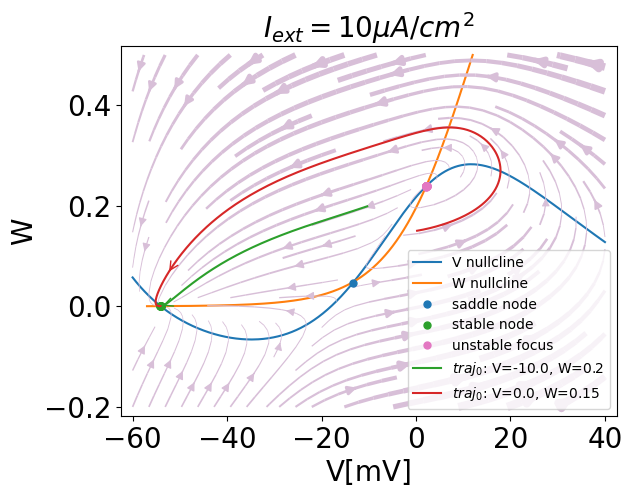

In [3]:
I_ext = [10,39,40,50]
# I_ext = [40]
for I_app in I_ext:
  model = MorrisLecar()
  pp = bp.analysis.PhasePlane2D(
    model,
    target_vars={'V': [-60, 40], 'W': [-0.2, 0.5]},
    pars_update={'Iext': I_app}, 
    resolutions={'V': 0.0005, 'W': 0.0001},
  )
  # plt.figure(figsize= (6,6))
  pp.plot_nullcline(x_style={'fmt': '-'}, y_style={'fmt': '-'})
  # Vector field can plotted as two ways:
  # - plot_method="streamplot" (default)
  # - plot_method="quiver"
  pp.plot_vector_field()

  # There are many ways to search fixed points. 
  # By default, it will use the nullcline points of the first 
  # variable ("V") as the initial points to perform fixed point searching
  pp.plot_fixed_point()

  # Trajectory plotting receives the setting of the initial points.
  # There may be multiple trajectories, therefore the initial points 
  # should be provived as a list/tuple/numpy.ndarray/Array
  pp.plot_trajectory({'V': [-10], 'W': [0.2]}, duration=600.)
  pp.plot_trajectory({'V': [0], 'W': [0.15]}, duration=600.)


  font1 = 20

  plt.xlabel("V[mV]",fontsize= font1)
  plt.ylabel("W",fontsize= font1)
  plt.xticks(np.arange(-60,60,20),fontsize=font1)
  plt.yticks(np.arange(-0.2,0.6,0.2),fontsize=font1)
  plt.title(r"$I_{ext}$"+ r"$= {} \mu A/cm^2$".format(I_app),fontsize=font1)
  plt.savefig('figure/pp_current_{}.png'.format(I_app),bbox_inches="tight")
  # show the phase plane figure
  pp.show_figure()


Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32241.56it/s]


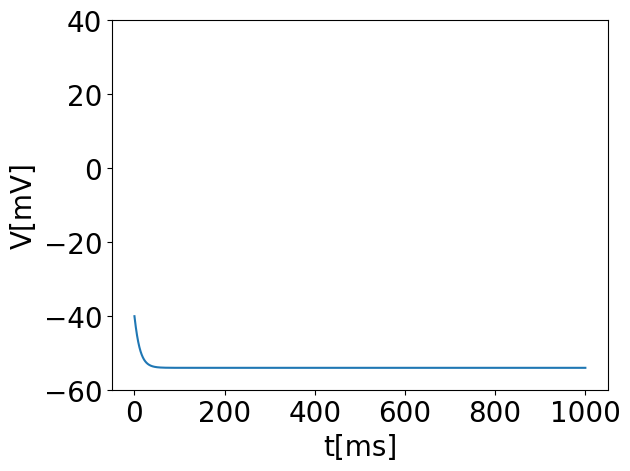

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32469.16it/s]


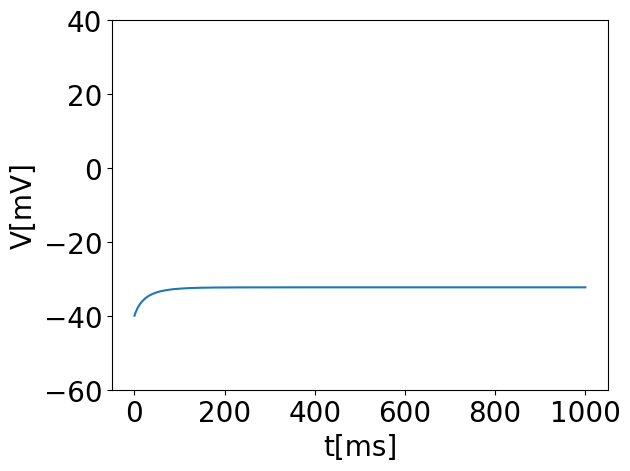

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32532.77it/s]


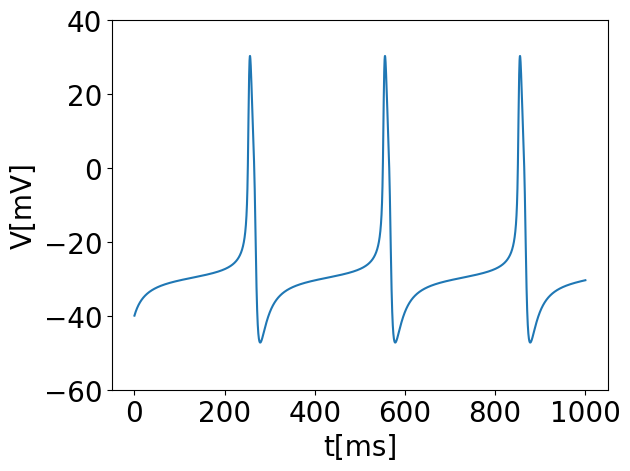

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32716.55it/s]


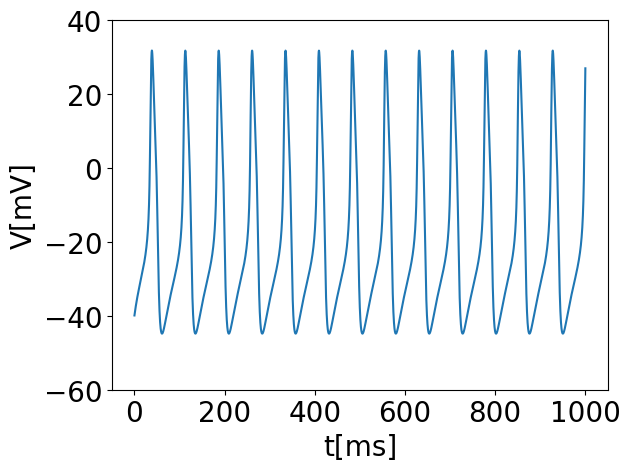

In [ ]:
I_ext = [10,39,40,50]
# I_ext = [40]
for I_app in I_ext:
    model = MorrisLecar()
    runner = bp.DSRunner(model, monitors=['V', 'W'], inputs=['Iext', I_app])
    runner.run(1000.)
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel("t[ms]",fontsize= font1)
    plt.ylabel("V[mV]",fontsize= font1)
    plt.xticks(np.arange(0,1020,200),fontsize=font1)
    plt.yticks(np.arange(-60,42,20),fontsize=font1)
    plt.savefig("figure/trace_I_{}.png".format(I_app),bbox_inches="tight")
    plt.show()

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
	segment 0 ...
	segment 1 ...
I am trying to find fixed points by optimization ...
	There are 12000 candidates
I am trying to filter out duplicate fixed points ...
	Found 141 fixed points.
I am plotting the limit cycle ...


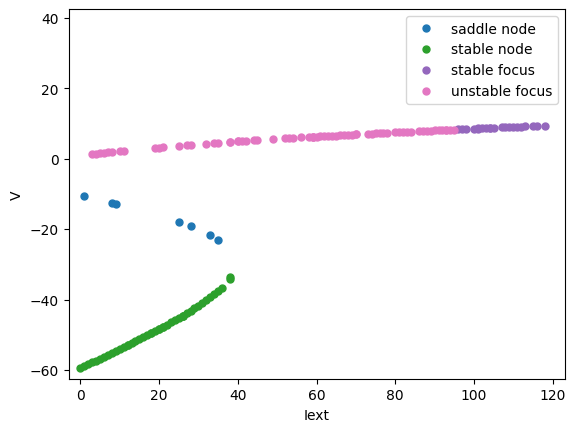

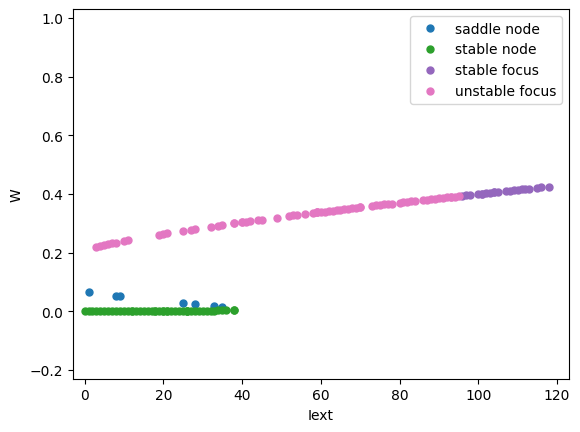

In [ ]:
model = MorrisLecar()
bif = bp.analysis.Bifurcation2D(
  model=model,
  target_vars={'V': [-60., 40.],'W': [-0.2, 1.]},
  target_pars={'Iext': [0., 120.]},
  resolutions={'Iext': 1.}
)
bif.plot_bifurcation(num_par_segments=2)
bif.plot_limit_cycle_by_sim()
bif.show_figure()

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1708 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 V=-37.2887922616689, W=0.069 is a stable focus.
	#2 V=-37.15421704136104, W=0.0685 is a stable focus.
	#3 V=-37.017293265749835, W=0.068 is a stable focus.
I am plotting the trajectory ...


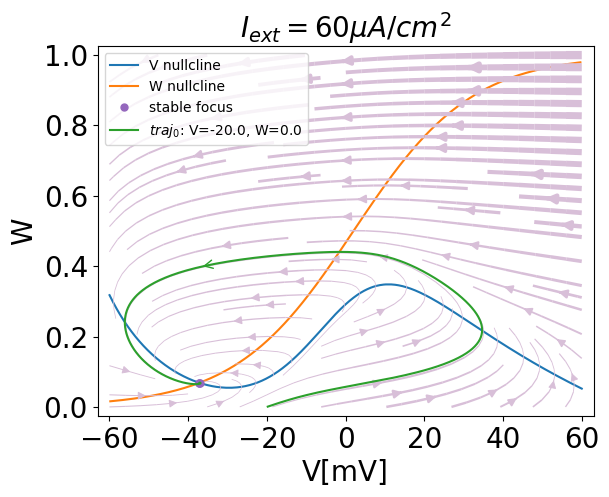

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2238 candidates
I am trying to filter out duplicate fixed points ...
	Found 17 fixed points.
	#1 V=-4.166504077021227, W=0.401 is a unstable node.
	#2 V=-4.117702635021813, W=0.4015 is a unstable node.
	#3 V=-4.06885002207347, W=0.402 is a unstable node.
	#4 V=-4.019944699676574, W=0.4025 is a unstable node.
	#5 V=-3.9709851142069357, W=0.403 is a unstable node.
	#6 V=-3.9219696964374506, W=0.4035 is a unstable node.
	#7 V=-3.8728968610481074, W=0.404 is a unstable node.
	#8 V=-3.823765006123657, W=0.4045 is a unstable node.
	#9 V=-3.774572512638796, W=0.405 is a unstable node.
	#10 V=-3.725317743930046, W=0.4055 is a unstable node.
	#11 V=-3.67599904515412, W=0.406 is a unstable node.
	#12 V=-3.62

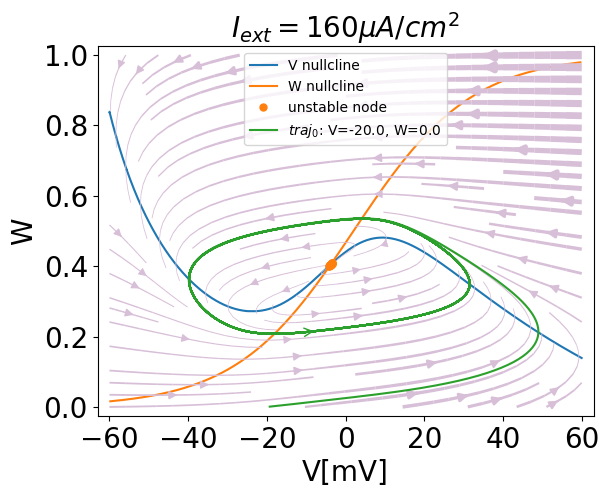

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2124 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 V=8.9200864751324, W=0.6155 is a stable focus.
I am plotting the trajectory ...


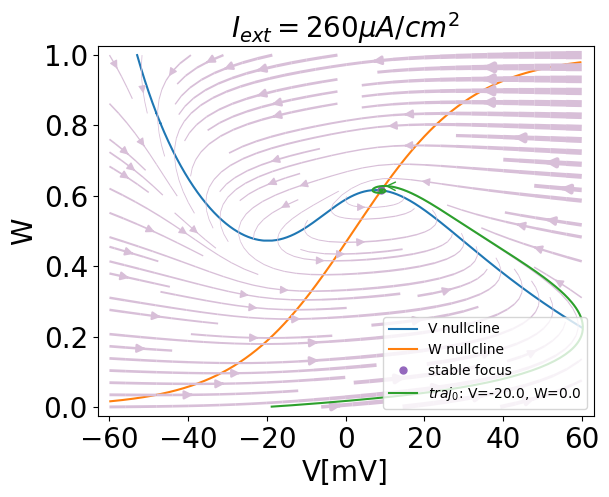

In [ ]:
I_ext = [60,160,260]
# I_ext = [40]
for I_app in I_ext:
  model_typeII = MorrisLecar(neu_type=2)
  pp = bp.analysis.PhasePlane2D(
    model_typeII,
    target_vars={'V': [-60, 60], 'W': [0., 1.]},
    pars_update={'Iext': I_app}, 
    resolutions={'V': 0.02, 'W': 0.0005},
  )
  # plt.figure(figsize= (6,6))
  pp.plot_nullcline(x_style={'fmt': '-'}, y_style={'fmt': '-'})
  # Vector field can plotted as two ways:
  # - plot_method="streamplot" (default)
  # - plot_method="quiver"
  pp.plot_vector_field()

  # There are many ways to search fixed points. 
  # By default, it will use the nullcline points of the first 
  # variable ("V") as the initial points to perform fixed point searching
  pp.plot_fixed_point()

  # Trajectory plotting receives the setting of the initial points.
  # There may be multiple trajectories, therefore the initial points 
  # should be provived as a list/tuple/numpy.ndarray/Array
  pp.plot_trajectory({'V': [-20], 'W': [0.]}, duration=600.)
  # pp.plot_trajectory({'V': [0], 'W': [0.15]}, duration=600.)


  font1 = 20

  plt.xlabel("V[mV]",fontsize= font1)
  plt.ylabel("W",fontsize= font1)
  plt.xticks(np.arange(-60,61,20),fontsize=font1)
  plt.yticks(np.arange(0.,1.01,0.2),fontsize=font1)
  plt.title(r"$I_{ext}$"+ r"$= {} \mu A/cm^2$".format(I_app),fontsize=font1)
  plt.savefig('figure/pp_current2_{}.png'.format(I_app),bbox_inches="tight")
  # show the phase plane figure
  pp.show_figure()

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 30823.45it/s]


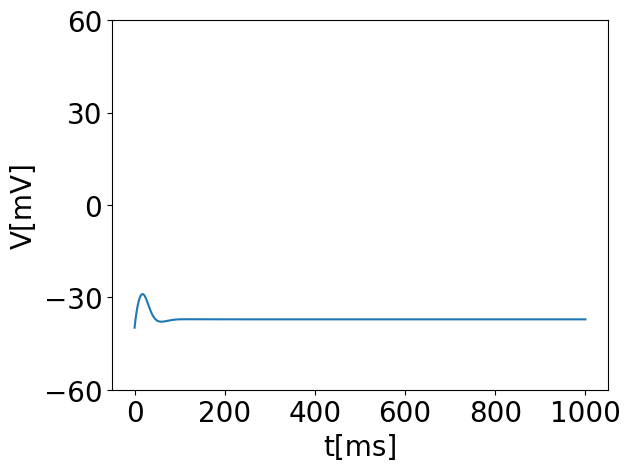

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32648.40it/s]


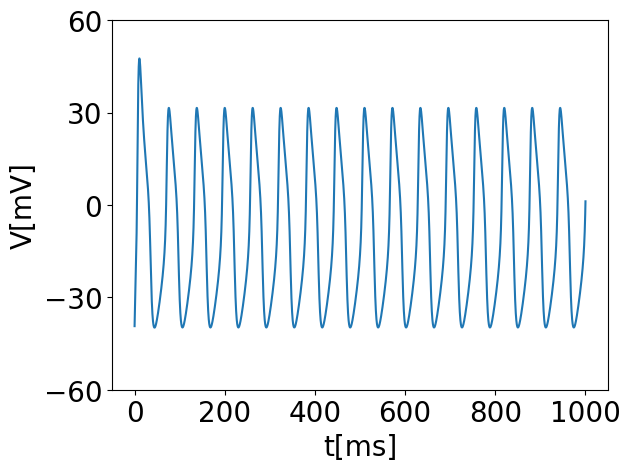

Predict 10000 steps: : 100%|██████████| 10000/10000 [00:00<00:00, 32842.97it/s]


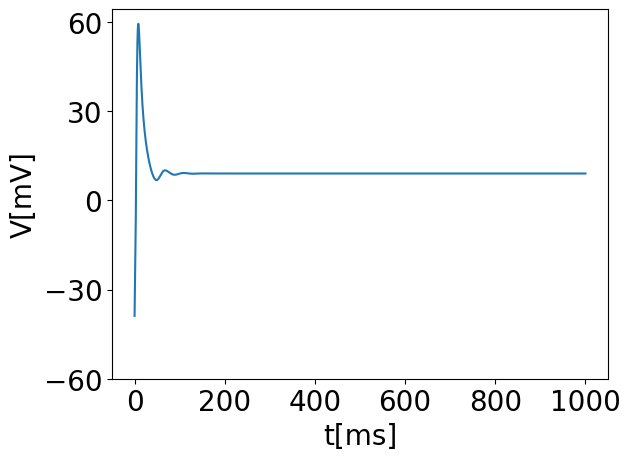

In [ ]:

for I_app in I_ext:
    model_typeII = MorrisLecar(neu_type=2)
    runner = bp.DSRunner(model_typeII, monitors=['V', 'W'], inputs=['Iext', I_app])
    runner.run(1000.)
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel("t[ms]",fontsize= font1)
    plt.ylabel("V[mV]",fontsize= font1)
    plt.xticks(np.arange(0,1020,200),fontsize=font1)
    plt.yticks(np.arange(-60,62,30),fontsize=font1)
    plt.savefig("figure/trace_II_{}.png".format(I_app),bbox_inches="tight")
    plt.show()